In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import jaccard_similarity_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.shape[0]

891

In [5]:
#drop column cabin as it has a lot of null values
df = df[[x for x in df.columns if x!= 'Cabin']]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [6]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#drop passenger id and name as it does not correlate with survival
df.drop(columns = ['PassengerId'],inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


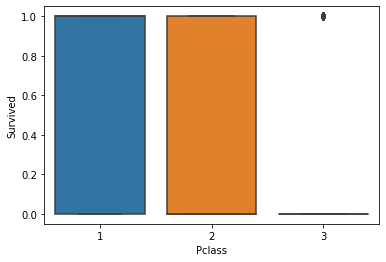

In [9]:
sns.boxplot(x='Pclass',y='Survived',data=df)

In [10]:
#we can see that class 3 has almost no chance to survive , so class does have some correlation with survival

In [11]:
len(df["Name"].unique())

891

In [12]:
#891 different names, clearly name has no correlation with survival
#so drop the column
df.drop(columns = ['Name'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S


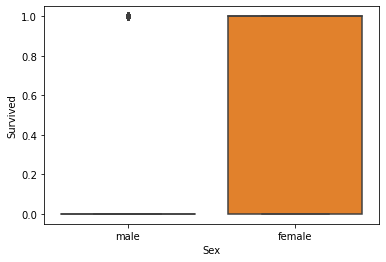

In [13]:
sns.boxplot(x='Sex',y='Survived',data=df)

In [14]:
#male had a very bleak chance of survival , so gender has some correlation with survival

In [15]:
df["Age"].isnull().sum()

177

In [16]:
df["Age"].sum()

21205.17

In [17]:
#test data sum is 10050.5 with 332 values
#train_data sum is 21205.17 with 714 values
mean = (21205.17+10050.5)/(714+332)
mean

29.881137667304014

In [18]:
#we replace mean by 29.8811
df.loc[df["Age"].isnull(),"Age"] = mean

In [19]:
df["Age"].isnull().sum()

0

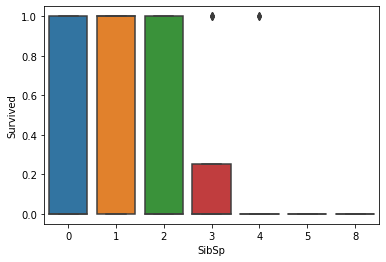

In [20]:
sns.boxplot(x='SibSp',y='Survived',data=df)

In [21]:
#different values of survival for different values of sibsp
#hence correlation exists

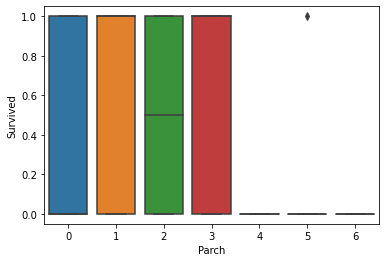

In [22]:
sns.boxplot(x='Parch',y='Survived',data=df)

In [23]:
#different values of survival for different values of parch
#hence correlation exists

In [24]:
df["Fare"].sum()

28693.9493

In [25]:
df.shape

(891, 9)

In [26]:
len(df["Ticket"].unique())

681

In [27]:
#681 different values of ticket , hence no correlation
#drop the column
df.drop(columns = ['Ticket'],inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [28]:
#fare might be a result of the Pclass , so lets not delete it for now

In [29]:
Y = df.iloc[:,0]

In [30]:
X = df.iloc[:,1:]

In [31]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.881138,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [32]:
mod_test = pd.read_csv('mod_test.csv')
mod_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [33]:
data = pd.concat([X,mod_test],axis=0)
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
413,3,male,29.881138,0,0,8.0500,S
414,1,female,39.000000,0,0,108.9000,C
415,3,male,38.500000,0,0,7.2500,S
416,3,male,29.881138,0,0,8.0500,S


In [37]:
#convert categorical variables
#Pclass 
data = pd.concat([data,pd.get_dummies(data["Pclass"]).iloc[:,:-1]],axis = 1)\
data.drop(columns = ['Pclass'],inplace=True)
data.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,1,2
0,male,22.0,1,0,7.2500,S,0,0
1,female,38.0,1,0,71.2833,C,1,0
2,female,26.0,0,0,7.9250,S,0,0
3,female,35.0,1,0,53.1000,S,1,0
4,male,35.0,0,0,8.0500,S,0,0


In [38]:
#Sibsp
data = pd.concat([data,pd.get_dummies(data["SibSp"]).iloc[:,:-1]],axis = 1)
data.drop(columns = ['SibSp'],inplace=True)
data.head()

,Sex,Age,Parch,Fare,Embarked,1,2,0,1,2,3,4,5
0,male,22.0,0,7.2500,S,0,0,0,1,0,0,0,0
1,female,38.0,0,71.2833,C,1,0,0,1,0,0,0,0
2,female,26.0,0,7.9250,S,0,0,1,0,0,0,0,0
3,female,35.0,0,53.1000,S,1,0,0,1,0,0,0,0
4,male,35.0,0,8.0500,S,0,0,1,0,0,0,0,0


In [39]:
#Sex
data = pd.concat([data,pd.get_dummies(data["Sex"]).iloc[:,:-1]],axis = 1)
data.drop(columns = ['Sex'],inplace=True)
data.head()

,Age,Parch,Fare,Embarked,1,2,0,1,2,3,4,5,female
0,22.0,0,7.2500,S,0,0,0,1,0,0,0,0,0
1,38.0,0,71.2833,C,1,0,0,1,0,0,0,0,1
2,26.0,0,7.9250,S,0,0,1,0,0,0,0,0,1
3,35.0,0,53.1000,S,1,0,0,1,0,0,0,0,1
4,35.0,0,8.0500,S,0,0,1,0,0,0,0,0,0


In [40]:
#Parch
data = pd.concat([data,pd.get_dummies(data["Parch"]).iloc[:,:-1]],axis = 1)
data.drop(columns = ['Parch'],inplace=True)
data.head()

,Age,Fare,Embarked,1,2,0,1,2,3,4,5,female,0,1,2,3,4,5,6
0,22.0,7.2500,S,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,38.0,71.2833,C,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
2,26.0,7.9250,S,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0
3,35.0,53.1000,S,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0
4,35.0,8.0500,S,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [41]:
#Embarked
data = pd.concat([data,pd.get_dummies(data["Embarked"]).iloc[:,:-1]],axis = 1)
data.drop(columns = ['Embarked'],inplace=True)
data.head()

,Age,Fare,1,2,0,1,2,3,4,5,female,0,1,2,3,4,5,6,C,Q
0,22.0,7.2500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,38.0,71.2833,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,35.0,53.1000,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [46]:
#feature scaling
sc = StandardScaler()
sc.fit(data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [48]:
data

,Age,Fare,1,2,0,1,2,3,4,5,female,0,1,2,3,4,5,6,C,Q
0,22.000000,7.2500,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,38.000000,71.2833,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0
2,26.000000,7.9250,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,35.000000,53.1000,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0
4,35.000000,8.0500,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,29.881138,8.0500,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
414,39.000000,108.9000,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
415,38.500000,7.2500,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
416,29.881138,8.0500,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [47]:
import pickle
pickle.dump(sc,open("feature_scaler.sav",'wb'))

In [52]:
X = data.iloc[:891,:]

In [54]:
mod_data = data.iloc[891:,:]

In [56]:
mod_data.to_csv('category_mod.csv',index=False)

In [57]:
X = sc.transform(X)

In [58]:
X

array([[-0.61197171, -0.50359486, -0.57235147, ..., -0.03911805,
        -0.50976981, -0.32204029],
       [ 0.63043107,  0.73450256,  1.74717818, ..., -0.03911805,
         1.96166973, -0.32204029],
       [-0.30137101, -0.49054359, -0.57235147, ..., -0.03911805,
        -0.50976981, -0.32204029],
       ...,
       [ 0.        , -0.19036443, -0.57235147, ..., -0.03911805,
        -0.50976981, -0.32204029],
       [-0.30137101, -0.06371879,  1.74717818, ..., -0.03911805,
         1.96166973, -0.32204029],
       [ 0.16453003, -0.49392726, -0.57235147, ..., -0.03911805,
        -0.50976981,  3.10520151]])

In [60]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.1,random_state = 0)

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV as gsc

In [83]:
rfc = RandomForestClassifier()
parameters = [{'n_estimators':[650,700,750],'criterion':['gini','entropy'],}]
gs_rfc = gsc(estimator=rfc,param_grid=parameters,scoring = 'accuracy')

In [84]:
gs_rfc.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [85]:
gs_rfc.best_params_

{'criterion': 'entropy', 'n_estimators': 700}

In [86]:
ypred = gs_rfc.predict(xtest)

In [87]:
jaccard_similarity_score(ytest,ypred)

d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8

In [89]:
from xgboost import XGBClassifier

In [96]:
xgb = XGBClassifier()
parameters = [{'gamma':[0.01,0.2,0.15],'booster':['gbtree','gblinear'],'learning_rate':[0.06,0.1,0.13]}]

In [97]:
xgb_gs = gsc(estimator = xgb,param_grid = parameters,scoring = 'accuracy')

In [98]:
xgb_gs.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,

In [99]:
xgb_gs.best_params_

{'booster': 'gbtree', 'gamma': 0.01, 'learning_rate': 0.06}

In [100]:
ypred = xgb_gs.predict(xtest)
jaccard_similarity_score(ytest,ypred)

d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8222222222222222

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
knn = KNeighborsClassifier()
parameters = [{'n_neighbors':[5,10,15],'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']}]

In [104]:
knn_gs = gsc(estimator = knn,param_grid = parameters,scoring = 'accuracy')

In [106]:
knn_gs.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [5, 10, 15]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [108]:
knn_gs.best_params_

{'algorithm': 'auto', 'n_neighbors': 10}

In [107]:
ypred = knn_gs.predict(xtest)
jaccard_similarity_score(ytest,ypred)

d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.7555555555555555

In [109]:
from sklearn.svm import SVC
svc = SVC()

In [116]:
parameters = [{'C':[2,3,4],'kernel':['rbf'],'gamma':[0.1,0.2,0.3]}]
svc_gs = gsc(estimator = svc,param_grid = parameters,scoring = 'accuracy')

In [117]:
svc_gs.fit(xtrain,ytrain)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [2, 3, 4], 'gamma': [0.1, 0.2, 0.3],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [118]:
svc_gs.best_params_

{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}

In [119]:
ypred = svc_gs.predict(xtest)
jaccard_similarity_score(ytest,ypred)

d:\program files\python\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.8

In [123]:
xgb_gs.fit(X,Y)

GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=False,

In [124]:
import pickle
pickle.dump(xgb_gs,open("classifier.sav",'wb'))